In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Initializing dataframe
df=pd.DataFrame()

In [3]:
df_2019 = pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2019.csv')
df_2021 = pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2021.csv')
df_2022 = pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2022.csv')
df_2018= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2018.csv')
df_2017= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2017.csv')
df_2016= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2016.csv')
df_2015= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2015.csv')
df_2014= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2014.csv')
df_2013= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2013.csv')
df_2012= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2012.csv')
df_2011= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2011.csv')
df_2010= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2010.csv')
df_2020= pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2020.csv')

df = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2018, df_2017, df_2016, df_2015, df_2014, 
               df_2013, df_2012, df_2011, df_2010], ignore_index=True, sort=False)



/var/folders/07/4nxt62n54t97x98lwcqpqbhc0000gn/T/ipykernel_13015/2698951501.py:1: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,209,210,218,219,220,233,234,235,236,237,238,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2019.csv')
/var/folders/07/4nxt62n54t97x98lwcqpqbhc0000gn/T/ipykernel_13015/2698951501.py:2: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('/Users/aidancarlisle/Downloads/play_by_play_2021.csv')
/var/folders/07/4nxt62n54t97x98lwcqpqbhc0000gn/T/ipykernel_13015/2698951501.py:3: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255

In [4]:
#reset the index
df=df.reset_index(drop=True)
print(df.shape)

(632374, 372)


In [5]:
#QB dataframe build

In [6]:

df['explosive_plays'] = df['yards_gained'].apply(lambda x: 1 if x > 15 else 0)
qb_stats= ('season', 'passer_id', 'passer', 'pass', 'complete_pass', 'interception', 'sack', 'yards_gained', 'touchdown', 
           'explosive_plays','third_down_converted', 'rushing_yards')
groupby_qb_stats=('season', 'passer_id', 'passer',)
qb_df = df[list(qb_stats)].groupby(list(groupby_qb_stats), as_index=False).sum()




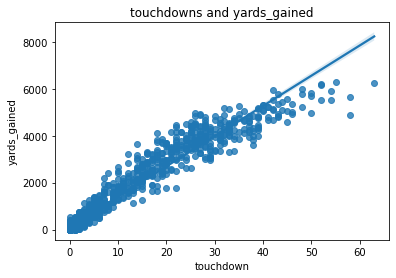

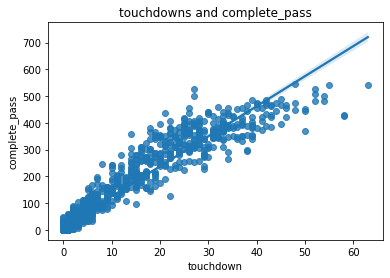

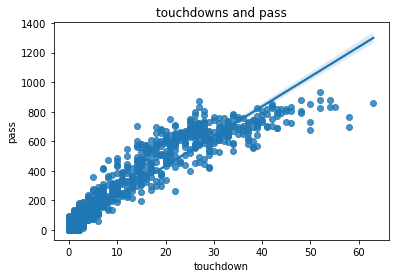

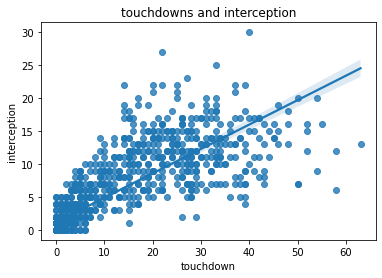

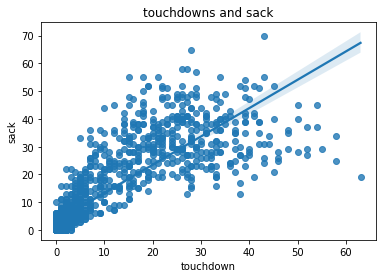

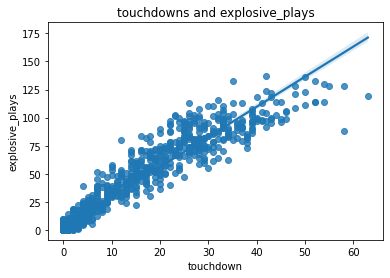

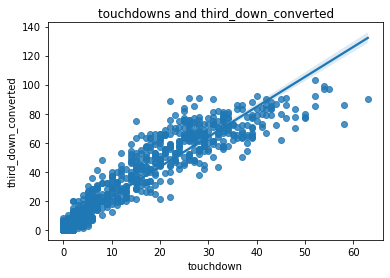

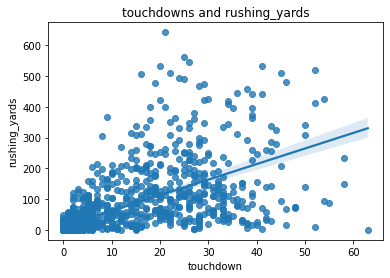

In [7]:
#correlates with touchdowns
for y in ['yards_gained', 'complete_pass', 'pass', 'interception', 'sack', 
          'explosive_plays', 'third_down_converted', 'rushing_yards']: 
    sns.regplot(data=qb_df, x='touchdown', y=y)
    plt.title(f'touchdowns and {y}')
    plt.show()

In [8]:
#make a copy
_df= qb_df.copy()

#add 1 to season
_df['season']= _df['season'].add(1)


In [9]:
# Merge with OG qb_df via left join
new_qb_df= (qb_df.merge(_df, on=['season', 'passer_id', 'passer'], suffixes=('', '_prev'), how='left'))

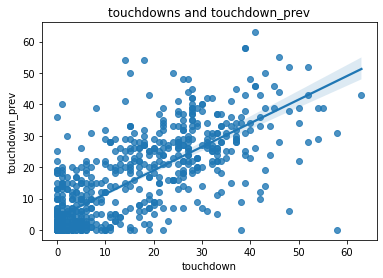

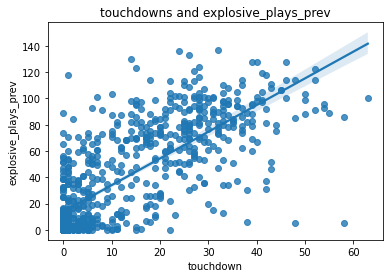

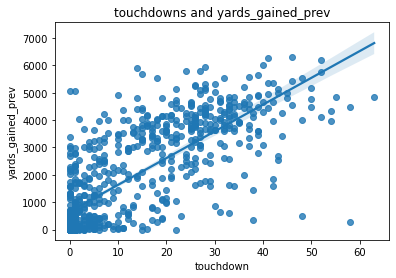

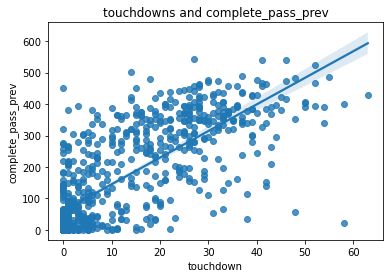

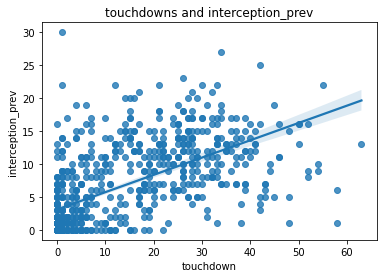

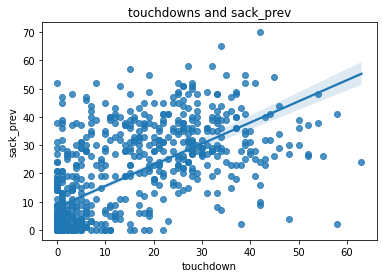

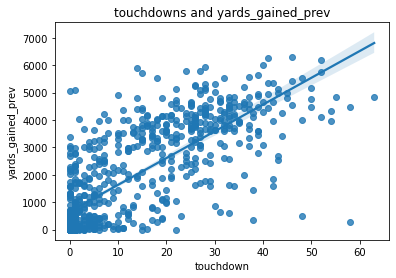

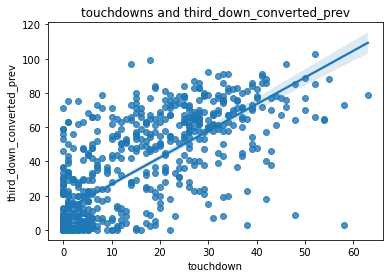

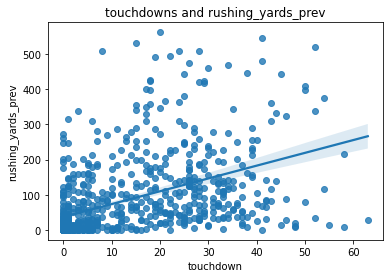

In [10]:
#correlation for next year touchdowns
for y in ['touchdown_prev', 'explosive_plays_prev', 'yards_gained_prev', 'complete_pass_prev', 
          'interception_prev', 'sack_prev', 'yards_gained_prev', 'third_down_converted_prev', 'rushing_yards_prev']:
    sns.regplot(data=new_qb_df, x='touchdown', y=y)
    plt.title(f"touchdowns and {y}")
    plt.show()


In [11]:

from sklearn.linear_model import Ridge

In [12]:
#features and targets
features= ['pass_prev', 'complete_pass_prev', 'yards_gained_prev', 'touchdown_prev', 'explosive_plays_prev',
          'third_down_converted_prev', 'rushing_yards_prev']
target='touchdown'

In [13]:
#eliminate nulls
model_data= (new_qb_df.dropna(subset= features+[target]))
print(model_data.shape)

(744, 21)


In [14]:
#training data
train_data = model_data.loc[model_data['season'].between(2010, 2020), :]


In [15]:
#testing data
test_data = model_data.loc[model_data['season'].isin([2021, 2022])]



In [16]:
#Ridge regression model
alpha=4.0
model= Ridge(alpha=alpha)


In [17]:
#Fit
model.fit(train_data.loc[:, features], train_data[target])

Ridge(alpha=4.0)

In [18]:
#Predict on test data
preds=model.predict (test_data.loc[:, features])

preds=pd.Series (preds, index=test_data.index)

test_data['preds']= preds

/var/folders/07/4nxt62n54t97x98lwcqpqbhc0000gn/T/ipykernel_13015/2240374954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds']= preds


In [24]:
#stats to check quality of model
rmse = mean_squared_error(test_data['touchdown'], test_data['preds']) ** 0.5
r2= pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print (f"rmse:{rmse}\nr2: {r2}")

rmse:8.223484637520885
r2: 0.6548664380419492


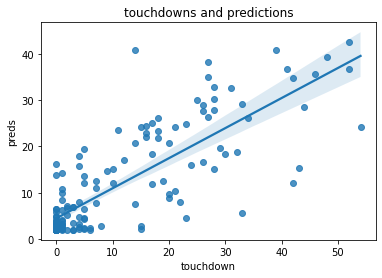

In [25]:
sns.regplot(data=test_data,x='touchdown', y='preds')
plt.title('touchdowns and predictions')
plt.show()